In [1]:
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install category_encoders


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Import the Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2       #f_regression    for Regression Analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from six import StringIO   #show leafs
from sklearn.tree import export_graphviz   #text on leafs and trees
from IPython.display import Image   #show final result

# **Import the Dataset**

In [4]:
data = pd.read_csv("Survey.csv")
data

,Timestamp,Name,Email id,Gender,Age,City (from which you do online shopping),State,Highest Education received,Profession,Annual Income,...,What is the maximum cart value you ever shopped?,"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?",Which device do you use for Online Shopping?,Which of the following value-addition services do you like the most on online shopping platform?,Which factors enhance your convenience for online shopping?,Why do you prefer Offline shopping over Online Shopping? (Tick the first option if you prefer Online Shopping)? Select your Top 2 choices*,Will you be more attracted to the platform with content in the native language?,Which payment option do you prefer the most while making an online purchase?,Do you prefer pre-online payment if there is an extra discount on it?,"Will you buy a subscription service offered by an online shopping platform that includes one-day delivery, exclusive deals, and offers, video streaming?"
0,21/11/2019 17:58:46,Rashi Srivastava,NaN,Female,18-25,Delhi,Delhi,High School,Student,Not Earning,...,"More than Rs. 20,000",I was not ready to purchase the product,Mobile App,“Recommended for you” section,"Huge variety of items and choices, Do not have...",I prefer Online Shopping!,No,Cash on Delivery,Yes,Yes
1,21/11/2019 17:59:29,Pankhudee gupta,NaN,Female,18-25,New delhi,Delhi,Graduation,Student,Not Earning,...,"Between Rs. 1,000- Rs. 5,000",I wanted to compare prices on other sites,Mobile App,“Recommended for you” section,"Huge variety of items and choices, Do not have...","I can actually touch, feel and experience the ...",Maybe,Debit Card,Maybe,Yes
2,21/11/2019 18:00:29,Meenal Sarwaiya,NaN,Female,18-25,Delhi,Delhi,High School,Student,Not Earning,...,"Between Rs. 10,000- Rs. 20,000",I changed my mind,Mobile App,“Recommended for you” section,Huge variety of items and choices,I prefer Online Shopping!,No,Net Banking,Yes,No
3,21/11/2019 21:13:46,Prachi,NaN,Female,18-25,Delhi,Delhi,Graduation,Student,Not Earning,...,"Less than Rs.1,000",I was not ready to purchase the product,Website on Mobile,“Recommended for you” section,"Low price as compared to offline markets, Offers",I can bargain to lower price in offline shoppi...,No,Cash on Delivery,Maybe,No
4,21/11/2019 21:15:58,Neha,nehatayal2292@gmail.com,Female,25-40,Faridabad,Haryana,Post Graduation,Business,6-15 Lakh,...,"Between Rs. 1,000- Rs. 5,000",I wanted to compare prices on other sites,Website on Mobile,Videos along with pictures of the item,"Huge variety of items and choices, Do not have...","I can actually touch, feel and experience the ...",Yes,"E-Wallets like Paytm, PhonePe, etc",Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,13/01/2020 18:28:10,Arpan Dwivedi,hydroarpan@gmail.com,Male,18-25,Kolkata,West Bengal,Graduation,Student,Not Earning,...,"Between Rs. 5,000- Rs. 10,000",Just wanted to save to products in my cart for...,Mobile App,“Recommended for you” section,"Huge variety of items and choices, Low price a...",I prefer Online Shopping!,Maybe,Debit Card,Yes,Yes
430,14/01/2020 16:41:03,Morewe Mall,morewerhh69@gmail.com,Female,18-25,"VELLORE, gorakhpur","Tamil nadu,uttar pradesh",Graduation,Student,Not Earning,...,"Between Rs. 1,000- Rs. 5,000",Shipping and Handling Costs were too high,Website on Mobile,“Recommended for you” section,"Huge variety of items and choices, Do not have...",I prefer Online Shopping!,Maybe,UPI like GooglePay,Yes,Yes
431,14/01/2020 17:42:02,Swarag Narayanasetty,swaragcrashing@gmail.com,Male,18-25,Vishakhapatnam,Andhra Pradesh,Graduation,Student,Not Earning,...,"Between Rs. 10,000- Rs. 20,000",I was not ready to purchase the product,Website on Laptop/Computer,“People who bought this also bought” section,"Do not have to travel, Offers, Being able to s...",I prefer Online Shopping!,No,UPI like GooglePay,Yes,Maybe
432,15/0

# **Data Prepration**

# **Pre-Processing**

# **Handle Categorical Data**

In [5]:
data.dtypes

Timestamp                                                                                                                                                                           object
Name                                                                                                                                                                                object
Email id                                                                                                                                                                            object
Gender                                                                                                                                                                              object
Age                                                                                                                                                                                 object
City (from which you do online shopping)                         

In [6]:
data.columns

Index(['Timestamp', 'Name', 'Email id', 'Gender', 'Age',
       'City (from which you do online shopping)', 'State',
       'Highest Education received', 'Profession', 'Annual Income',
       'Word of Mouth (recommended by a friend)',
       'Conventional Advertisements like TV, Newspaper Ads, etc',
       'Social Media like Facebook, Instagram, TikTok, YouTube, etc.',
       'Web series/ Movies',
       'Price of the item (comparatively lower than the price that is offered in offline markets)',
       'The item is made up of high quality', 'Return and Exchange Policy',
       'Reviews and Ratings', 'Seller of the Product',
       'Description of the product along with display picture from various angles',
       'Number of days of Delivery', 'Delivery Charges', 'Electronics',
       'Apparels (Clothes)', 'Home and Furnishing',
       'Baby, Beauty and Personal Care', 'Books and Stationery', 'Grocery',
       'Which among the following E-Commerce Website have you ever opened?',
       

In [7]:
data1 = data.drop(['Timestamp','Name','Email id','City (from which you do online shopping)','State','Highest Education received'], axis=1)
data1

,Gender,Age,Profession,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,...,What is the maximum cart value you ever shopped?,"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?",Which device do you use for Online Shopping?,Which of the following value-addition services do you like the most on online shopping platform?,Which factors enhance your convenience for online shopping?,Why do you prefer Offline shopping over Online Shopping? (Tick the first option if you prefer Online Shopping)? Select your Top 2 choices*,Will you be more attracted to the platform with content in the native language?,Which payment option do you prefer the most while making an online purchase?,Do you prefer pre-online payment if there is an extra discount on it?,"Will you buy a subscription service offered by an online shopping platform that includes one-day delivery, exclusive deals, and offers, video streaming?"
0,Female,18-25,Student,Not Earning,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,...,"More than Rs. 20,000",I was not ready to purchase the product,Mobile App,“Recommended for you” section,"Huge variety of items and choices, Do not have...",I prefer Online Shopping!,No,Cash on Delivery,Yes,Yes
1,Female,18-25,Student,Not Earning,4.000000,2.000000,2.000000,2.000000,3.000000,4.000000,...,"Between Rs. 1,000- Rs. 5,000",I wanted to compare prices on other sites,Mobile App,“Recommended for you” section,"Huge variety of items and choices, Do not have...","I can actually touch, feel and experience the ...",Maybe,Debit Card,Maybe,Yes
2,Female,18-25,Student,Not Earning,3.000000,2.000000,2.000000,4.000000,2.000000,4.000000,...,"Between Rs. 10,000- Rs. 20,000",I changed my mind,Mobile App,“Recommended for you” section,Huge variety of items and choices,I prefer Online Shopping!,No,Net Banking,Yes,No
3,Female,18-25,Student,Not Earning,3.000000,2.000000,2.000000,1.000000,4.000000,3.000000,...,"Less than Rs.1,000",I was not ready to purchase the product,Website on Mobile,“Recommended for you” section,"Low price as compared to offline markets, Offers",I can bargain to lower price in offline shoppi...,No,Cash on Delivery,Maybe,No
4,Female,25-40,Business,6-15 Lakh,4.000000,3.000000,2.000000,2.000000,4.000000,4.000000,...,"Between Rs. 1,000- Rs. 5,000",I wanted to compare prices on other sites,Website on Mobile,Videos along with pictures of the item,"Huge variety of items and choices, Do not have...","I can actually touch, feel and experience the ...",Yes,"E-Wallets like Paytm, PhonePe, etc",Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Male,18-25,Student,Not Earning,3.000000,2.000000,2.000000,2.000000,4.000000,4.000000,...,"Between Rs. 5,000- Rs. 10,000",Just wanted to save to products in my cart for...,Mobile App,“Recommended for you” section,"Huge variety of items and choices, Low price a...",I prefer Online Shopping!,Maybe,Debit Card,Yes,Yes
430,Female,18-25,Student,Not Earning,1.000000,1.000000,2.000000,1.000000,4.000000,4.000000,...,"Between Rs. 1,000- Rs. 5,000",Shipping and Handling Costs were too high,Website on Mobile,“Recommended for you” section,"Huge variety of items and choices, Do not have...",I prefer Online Shopping!,Maybe,UPI like GooglePay,Yes,Yes
431,Male,18-25,Student,Not Earning,2.000000,1.000000,3.000000,4.000000,4.000000,3.000000,...,"Between Rs. 10,000- Rs. 20,000",I was not ready to purchase the product,Website on Laptop/Computer,“People who bought this also bought” section,"Do not have to travel, Offers, Being able to s...",I prefer Online Shopping!,No,UPI like GooglePay,Yes,Maybe
432,Mal

In [8]:
data2 = data1.replace({"Gender" : "Female"}, 0).replace({"Gender" : "Male"}, 1)
data3 = data2.replace({"Age" : "Less than 18"}, 1).replace({"Age" : "18-25"}, 2).replace(
    {"Age" : "25-40"}, 3).replace({"Age" : "40-60"}, 4).replace({"Age" : "Above 60"}, 5)
data4 = data3.replace({"Profession" : "Student"}, 1).replace({"Profession" : "Housewife"}, 2).replace(
    {"Profession" : "Business"}, 3)
data5 = data4.replace({"Annual Income" : "Not Earning"}, 1).replace({"Annual Income" : ""}, 1).replace(
    {"Annual Income" : "Upto 1 Lakh"}, 2).replace({"Annual Income" : "1-6 Lakh"}, 3).replace(
    {"Annual Income" : "6-15 Lakh"}, 4).replace({"Annual Income" : "More than 15 Lakh"}, 5)
data5 = data5.fillna(0)
data5["Annual Income"]=data5["Annual Income"].astype(int)
data6 = data5.replace({"Which online shopping website do you use the most?" : "Flipkart"}, 1).replace(
    {"Which online shopping website do you use the most?" : "Amazon"}, 2).replace(
    {"Which online shopping website do you use the most?" : "Snapdeal"}, 3).replace(
    {"Which online shopping website do you use the most?" : "PayTm Mall"}, 4).replace(
    {"Which online shopping website do you use the most?" : "Bewakoof.com"}, 5).replace(
    {"Which online shopping website do you use the most?" : "Myntra"}, 6).replace(
    {"Which online shopping website do you use the most?" : "Zivame"}, 7).replace(
    {"Which online shopping website do you use the most?" : "Healthkart"}, 8).replace(
    {"Which online shopping website do you use the most?" : "Lenskart.com"}, 9)
data7 = data6.replace({"How many online shopping orders do you place annually?" : "Less than 10"}, 1).replace(
    {"How many online shopping orders do you place annually?" : "10-20"}, 2).replace(
    {"How many online shopping orders do you place annually?" : "20-30"}, 3).replace(
    {"How many online shopping orders do you place annually?" : "More than 30"}, 4)
data8 = data7.replace({"What is your “Average Cart Value”?" : "Less than Rs. 1,000"}, 1).replace(
    {"What is your “Average Cart Value”?" : "Between Rs. 1,000- Rs. 5,000"}, 2).replace(
    {"What is your “Average Cart Value”?" : "Between Rs. 5,000- Rs. 10,000"}, 3).replace(
    {"What is your “Average Cart Value”?" : "Between Rs. 10,000- Rs. 20,000"}, 4).replace(
    {"What is your “Average Cart Value”?" : "More than Rs. 20,000"}, 5)
data9 = data8.replace({"What is the maximum cart value you ever shopped?" : "Less than Rs.1,000"}, 1).replace(
    {"What is the maximum cart value you ever shopped?" : "Between Rs. 1,000- Rs. 5,000"}, 2).replace(
    {"What is the maximum cart value you ever shopped?" : "Between Rs. 5,000- Rs. 10,000"}, 3).replace(
    {"What is the maximum cart value you ever shopped?" : "Between Rs. 10,000- Rs. 20,000"}, 4).replace(
    {"What is the maximum cart value you ever shopped?" : "More than Rs. 20,000"}, 5)
data10 = data9.replace({"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Shipping and Handling Costs were too high"}, 1).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "I was not ready to purchase the product"}, 2).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "I wanted to compare prices on other sites"}, 3).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Product price was higher than I was willing to pay"}, 4).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Just wanted to save to products in my cart for later consideration"}, 5).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Shipping costs and handling costs were listed too late in the checkout process"}, 6).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "I didn’t want to register with the site"}, 7).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Site was asking too much information"}, 8).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Checkout process was too long and confusing"}, 9).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "Website was slow"}, 10).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "I didn’t have enough information to make the purchase"}, 11).replace(
    {"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?" : "I changed my mind"}, 12)
data10_1 = data10.replace({"Which of the following value-addition services do you like the most on online shopping platform?" : "Image and Voice Search Options"}, 1).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "Platform’s own payment wallet like AmazonPay etc"}, 2).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "Videos along with pictures of the item"}, 3).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "“Recommended for you” section"}, 4).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "“People who bought this also bought” section"}, 5).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "Chat-Bots which act as virtual assistants"}, 6).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "Personalized product pages based on location"}, 7).replace(
    {"Which of the following value-addition services do you like the most on online shopping platform?" : "Getting personal emails for special discounts"}, 8)
data10_2 = data10_1.replace({" Will you be more attracted to the platform with content in the native language?" : "Yes"}, 1).replace(
    {" Will you be more attracted to the platform with content in the native language?" : "No"}, 2).replace(
    {" Will you be more attracted to the platform with content in the native language?" : "Maybe"}, 3)
data10_3 = data10_2.replace({"Which payment option do you prefer the most while making an online purchase?" : "Debit Card"}, 1).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "Credit Card"}, 2).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "Cash on Delivery"}, 3).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "E-Wallets like Paytm, PhonePe, etc"}, 4).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "UPI like GooglePay"}, 5).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "Platform exclusive e-wallets like Amazon pay"}, 6).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "Net Banking"}, 7).replace(
    {"Which payment option do you prefer the most while making an online purchase?" : "Zero interest EMI"}, 8)
data10_4 = data10_3.replace({" Do you prefer pre-online payment if there is an extra discount on it?" : "Yes"}, 1).replace(
    {" Do you prefer pre-online payment if there is an extra discount on it?" : "No"}, 2).replace(
    {" Do you prefer pre-online payment if there is an extra discount on it?" : "Maybe"}, 3)
data10_5 = data10_4.replace({"Will you buy a subscription service offered by an online shopping platform that includes one-day delivery, exclusive deals, and offers, video streaming?" : "Yes"}, 1).replace(
    {"Will you buy a subscription service offered by an online shopping platform that includes one-day delivery, exclusive deals, and offers, video streaming?" : "No"}, 2).replace(
    {"Will you buy a subscription service offered by an online shopping platform that includes one-day delivery, exclusive deals, and offers, video streaming?" : "Maybe"}, 3)
data11 = data10_5.replace({"Which device do you use for Online Shopping?" : "Mobile App"}, 1).replace(
    {"Which device do you use for Online Shopping?" : "Website on Laptop/Computer"}, 2).replace(
    {"Which device do you use for Online Shopping?" : "Website on Mobile"}, 3)
data11

,Gender,Age,Profession,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,...,What is the maximum cart value you ever shopped?,"Thinking of the last time you put items in your shopping cart but did not finish the online purchase, which of the following describes why you didn’t complete the transaction?",Which device do you use for Online Shopping?,Which of the following value-addition services do you like the most on online shopping platform?,Which factors enhance your convenience for online shopping?,Why do you prefer Offline shopping over Online Shopping? (Tick the first option if you prefer Online Shopping)? Select your Top 2 choices*,Will you be more attracted to the platform with content in the native language?,Which payment option do you prefer the most while making an online purchase?,Do you prefer pre-online payment if there is an extra discount on it?,"Will you buy a subscription service offered by an online shopping platform that includes one-day delivery, exclusive deals, and offers, video streaming?"
0,0.0,2.0,1.0,1,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,...,5,2,1,4,"Huge variety of items and choices, Do not have...",I prefer Online Shopping!,2,3,1,1
1,0.0,2.0,1.0,1,4.000000,2.000000,2.000000,2.000000,3.000000,4.000000,...,2,3,1,4,"Huge variety of items and choices, Do not have...","I can actually touch, feel and experience the ...",3,1,3,1
2,0.0,2.0,1.0,1,3.000000,2.000000,2.000000,4.000000,2.000000,4.000000,...,4,12,1,4,Huge variety of items and choices,I prefer Online Shopping!,2,7,1,2
3,0.0,2.0,1.0,1,3.000000,2.000000,2.000000,1.000000,4.000000,3.000000,...,1,2,3,4,"Low price as compared to offline markets, Offers",I can bargain to lower price in offline shoppi...,2,3,3,2
4,0.0,3.0,3.0,4,4.000000,3.000000,2.000000,2.000000,4.000000,4.000000,...,2,3,3,3,"Huge variety of items and choices, Do not have...","I can actually touch, feel and experience the ...",1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,1.0,2.0,1.0,1,3.000000,2.000000,2.000000,2.000000,4.000000,4.000000,...,3,5,1,4,"Huge variety of items and choices, Low price a...",I prefer Online Shopping!,3,1,1,1
430,0.0,2.0,1.0,1,1.000000,1.000000,2.000000,1.000000,4.000000,4.000000,...,2,1,3,4,"Huge variety of items and choices, Do not have...",I prefer Online Shopping!,3,5,1,1
431,1.0,2.0,1.0,1,2.000000,1.000000,3.000000,4.000000,4.000000,3.000000,...,4,2,2,5,"Do not have to travel, Offers, Being able to s...",I prefer Online Shopping!,2,5,1,3
432,1.0,2.0,1.0,1,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,1,1,1,1,"Huge variety of items and choices, Do not have...","I prefer Online Shopping!, I can bargain to lo...",1,1,1,1


# **Incoding Cathegorical Data**

In [9]:
#new_cols = [
#        'Flipkart', 'Amazon', 'Snapdeal', 'PayTm Mall', 'Home Shop18', 'Jabong', 'Ebay', 'Bewakoof.com',
#        'Bewakoof.com', 'InkFruit', 'Pepperfry', 'BigBasket', 'Bestylish', 'Zivame', 'Healthkart', 'Firstcry.com',
#        'Lenskart.com', 'Motodeals.com'
#    ]

In [10]:
#for row in data11.index:
#    for i in new_cols:
#        webs = data11.iloc[row]['Which shopping platforms did you shop from, in the last one year?']
#        if i in webs:
#          data11.loc[data11.index[row], f'Have you last year shopping from E-Commerce website {i}'] = int(1)
#        else:
#          data11.loc[data11.index[row], f'Have you last year shopping from E-Commerce website {i}'] = int(0)
#for i in new_cols:
#    data11[f'Have you last year shopping from E-Commerce website {i}']=data11[f'Have you last year shopping from E-Commerce website {i}'].astype(int)


In [11]:
new_cols1 = [
        'I always stick with a particular shopping platform', 'Because of price variance', 'Because of After sales service',
        'Because of return and exchange policy', 'Because of fast delivery', 'Because the product range was more on another platform',
        'Bad past experience with my previous platform', 'I shop different categories from different platforms (like Electronics from Amazon,Footwear from Flipkart, etc.)',
        'Because my friend told me that the other platform was better', 'I saw good discounts on one platform as compared to others on special occasions (likeDiwali, New Year, etc.)'
    ]

In [14]:
for row in data11.index:
    for i in new_cols1:
        reasons = data11.iloc[row]['Please specify the reason why you didn’t stick to one particular platform. Choose Option 1 if you have always shopped from one online platform']
        if i in reasons:
          data11.loc[data11.index[row], f'Did not stick to one platform: {i}'] = int(1)
        else:
          data11.loc[data11.index[row], f'Did not stick to one platform: {i}'] = int(0)
for i in new_cols1:
    data11[f'Did not stick to one platform: {i}']=data11[f'Did not stick to one platform: {i}'].astype(int)

data11

TypeError: argument of type 'int' is not iterable

In [ ]:
new_cols2 = [
        'Huge variety of items and choices', 'Do not have to travel', 'Low price as compared to offline markets',
        'Offers', 'Being able to shop 24*7', 'Comparison of Prices'
        ]

In [ ]:
for row in data11.index:
    for i in new_cols2:
        factors = data11.iloc[row][' Which factors enhance your convenience for online shopping?']
        if i in factors:
          data11.loc[data11.index[row], f'enhances convenience for online shopping: {i}'] = int(1)
        else:
          data11.loc[data11.index[row], f'enhances convenience for online shopping: {i}'] = int(0)
for i in new_cols2:
    data11[f'enhances convenience for online shopping: {i}']=data11[f'enhances convenience for online shopping: {i}'].astype(int)

data11

,Gender,Age,Profession,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,...,Did not stick to one platform: Bad past experience with my previous platform,"Did not stick to one platform: I shop different categories from different platforms (like Electronics from Amazon,Footwear from Flipkart, etc.)",Did not stick to one platform: Because my friend told me that the other platform was better,"Did not stick to one platform: I saw good discounts on one platform as compared to others on special occasions (likeDiwali, New Year, etc.)",enhances convenience for online shopping: Huge variety of items and choices,enhances convenience for online shopping: Do not have to travel,enhances convenience for online shopping: Low price as compared to offline markets,enhances convenience for online shopping: Offers,enhances convenience for online shopping: Being able to shop 24*7,enhances convenience for online shopping: Comparison of Prices
0,1,2,1,1,3,2,3,2,2,2,...,0,0,0,0,0,0,0,1,1,0
1,0,2,3,3,3,2,0,2,4,3,...,0,0,0,0,0,0,1,0,1,0
2,1,2,1,1,4,2,2,2,4,4,...,0,0,0,0,1,1,1,1,1,1
3,1,2,1,1,4,3,3,2,4,4,...,0,0,0,0,0,0,0,0,0,1
4,1,2,1,1,3,2,1,1,3,3,...,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,1,4,3,5,1,2,1,1,4,3,...,0,0,0,0,1,0,0,0,0,0
429,1,2,1,1,2,2,3,2,2,2,...,0,0,1,0,0,0,1,0,0,0
430,0,2,1,1,3,3,2,1,3,4,...,0,0,0,0,1,1,0,1,0,0
431,1,2,1,1,3,1,2,2,3,4,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
new_cols3 = [
        'I prefer Online Shopping!', 'Do not have to travel', 'I can bargain to lower price in offline shopping',
        'I can actually touch, feel and experience the product', 'I don’t have to wait for my order to arrive', 'I do not trust the online platforms',
        'I have internet connectivity issues in my area', 'Its more fun to shop offline'
        ]

In [ ]:
for row in data11.index:
    for i in new_cols3:
        options = data11.iloc[row]['Why do you prefer Offline shopping over Online Shopping? (Tick the first option if you prefer Online Shopping)? Select your Top 2 choices*']
        if i in options:
          data11.loc[data11.index[row], f'Reason to prefer offline shopping: {i}'] = int(1)
        else:
          data11.loc[data11.index[row], f'Reason to prefer offline shopping: {i}'] = int(0)
for i in new_cols3:
    data11[f'Reason to prefer offline shopping: {i}']=data11[f'Reason to prefer offline shopping: {i}'].astype(int)

data11

,Gender,Age,Profession,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,...,enhances convenience for online shopping: Being able to shop 24*7,enhances convenience for online shopping: Comparison of Prices,Reason to prefer offline shopping: I prefer Online Shopping!,Reason to prefer offline shopping: Do not have to travel,Reason to prefer offline shopping: I can bargain to lower price in offline shopping,"Reason to prefer offline shopping: I can actually touch, feel and experience the product",Reason to prefer offline shopping: I don’t have to wait for my order to arrive,Reason to prefer offline shopping: I do not trust the online platforms,Reason to prefer offline shopping: I have internet connectivity issues in my area,Reason to prefer offline shopping: Its more fun to shop offline
0,1,2,1,1,3,2,3,2,2,2,...,1,0,0,0,1,1,0,0,0,0
1,0,2,3,3,3,2,0,2,4,3,...,1,0,0,0,0,1,1,0,0,0
2,1,2,1,1,4,2,2,2,4,4,...,1,1,1,0,0,0,0,0,0,0
3,1,2,1,1,4,3,3,2,4,4,...,0,1,0,0,0,1,0,1,0,0
4,1,2,1,1,3,2,1,1,3,3,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,1,4,3,5,1,2,1,1,4,3,...,0,0,0,0,1,1,0,0,0,0
429,1,2,1,1,2,2,3,2,2,2,...,0,0,0,0,0,1,0,0,0,0
430,0,2,1,1,3,3,2,1,3,4,...,0,0,0,0,1,1,0,0,0,0
431,1,2,1,1,3,1,2,2,3,4,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
data12 = data11.drop(['Which device do you use for Online Shopping?', 'Profession',
                      'What is the maximum cart value you ever shopped?',
                      'Why do you prefer Offline shopping over Online Shopping? (Tick the first option if you prefer Online Shopping)? Select your Top 2 choices*',
                      ' Which factors enhance your convenience for online shopping?', 'Which among the following E-Commerce Website have you ever opened?',
                      'Please specify the reason why you didn’t stick to one particular platform. Choose Option 1 if you have always shopped from one online platform',
                      'Which shopping platforms did you shop from, in the last one year?'], axis=1)
data12

,Gender,Age,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,Return and Exchange Policy,...,enhances convenience for online shopping: Being able to shop 24*7,enhances convenience for online shopping: Comparison of Prices,Reason to prefer offline shopping: I prefer Online Shopping!,Reason to prefer offline shopping: Do not have to travel,Reason to prefer offline shopping: I can bargain to lower price in offline shopping,"Reason to prefer offline shopping: I can actually touch, feel and experience the product",Reason to prefer offline shopping: I don’t have to wait for my order to arrive,Reason to prefer offline shopping: I do not trust the online platforms,Reason to prefer offline shopping: I have internet connectivity issues in my area,Reason to prefer offline shopping: Its more fun to shop offline
0,1,2,1,3,2,3,2,2,2,2,...,1,0,0,0,1,1,0,0,0,0
1,0,2,3,3,2,0,2,4,3,4,...,1,0,0,0,0,1,1,0,0,0
2,1,2,1,4,2,2,2,4,4,4,...,1,1,1,0,0,0,0,0,0,0
3,1,2,1,4,3,3,2,4,4,3,...,0,1,0,0,0,1,0,1,0,0
4,1,2,1,3,2,1,1,3,3,3,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,1,4,5,1,2,1,1,4,3,2,...,0,0,0,0,1,1,0,0,0,0
429,1,2,1,2,2,3,2,2,2,3,...,0,0,0,0,0,1,0,0,0,0
430,0,2,1,3,3,2,1,3,4,3,...,0,0,0,0,1,1,0,0,0,0
431,1,2,1,3,1,2,2,3,4,2,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
column_to_move = data12.pop('How many online shopping orders do you place annually?') # remove the column from its original position
data12.insert(51, 'How many online shopping orders do you place annually?', column_to_move) # insert the column at the desired position

In [ ]:
column_to_move = data12.pop('What is your “Average Cart Value”?') # remove the column from its original position
data12.insert(52, 'What is your “Average Cart Value”?', column_to_move) # insert the column at the desired position

In [ ]:
column_to_move = data12.pop('Reason to prefer offline shopping: I prefer Online Shopping!') # remove the column from its original position
data12.insert(53, 'Reason to prefer offline shopping: I prefer Online Shopping!', column_to_move) # insert the column at the desired position

In [ ]:
print(data12.dtypes)

Gender                                                                                                                                                                             int64
Age                                                                                                                                                                                int64
Annual Income                                                                                                                                                                      int64
Word of Mouth (recommended by a friend)                                                                                                                                            int64
Conventional Advertisements like TV, Newspaper Ads, etc                                                                                                                            int64
Social Media like Facebook, Instagram, TikTok, YouTube, etc.               

In [ ]:
#ADS
ads = data12.iloc[:,[3,4,5,6,51,52,53]]
ads

,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,3,2,3,2,3,0,0
1,3,2,0,2,2,0,0
2,4,2,2,2,5,0,1
3,4,3,3,2,1,0,0
4,3,2,1,1,1,0,1
...,...,...,...,...,...,...,...
428,1,2,1,1,1,0,0
429,2,2,3,2,1,0,0
430,3,3,2,1,2,0,0
431,3,1,2,2,2,0,0


In [ ]:
#Factors
factors = data12.iloc[:,[7,8,9,10,11,12,13,14,51,52,53]]
factors

,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,Return and Exchange Policy,Reviews and Ratings,Seller of the Product,Description of the product along with display picture from various angles,Number of days of Delivery,Delivery Charges,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,2,2,2,2,2,3,3,3,3,0,0
1,4,3,4,4,4,4,4,4,2,0,0
2,4,4,4,4,4,4,4,4,5,0,1
3,4,4,3,4,4,3,2,4,1,0,0
4,3,3,3,3,2,4,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
428,4,3,2,3,2,2,3,2,1,0,0
429,2,2,3,2,2,2,3,2,1,0,0
430,3,4,3,4,3,3,3,4,2,0,0
431,3,4,2,4,2,3,1,2,2,0,0


In [ ]:
#Types
types = data12.iloc[:,[15,16,17,18,19,20,51,52,53]]
types

,Electronics,Apparels (Clothes),Home and Furnishing,"Baby, Beauty and Personal Care",Books and Stationery,Grocery,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,2,3,3,2,2,3,3,0,0
1,0,0,0,4,3,2,2,0,0
2,4,4,3,2,3,1,5,0,1
3,3,1,1,1,3,1,1,0,0
4,2,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
428,1,1,1,1,0,0,1,0,0
429,2,2,2,2,2,2,1,0,0
430,1,2,1,2,1,3,2,0,0
431,3,3,0,0,3,3,2,0,0


In [ ]:
#Did not stick to one platform
stick = data12.iloc[:,[28,29,30,31,32,33,34,35,36,37,51,52,53]]
stick

,Did not stick to one platform: I always stick with a particular shopping platform,Did not stick to one platform: Because of price variance,Did not stick to one platform: Because of After sales service,Did not stick to one platform: Because of return and exchange policy,Did not stick to one platform: Because of fast delivery,Did not stick to one platform: Because the product range was more on another platform,Did not stick to one platform: Bad past experience with my previous platform,"Did not stick to one platform: I shop different categories from different platforms (like Electronics from Amazon,Footwear from Flipkart, etc.)",Did not stick to one platform: Because my friend told me that the other platform was better,"Did not stick to one platform: I saw good discounts on one platform as compared to others on special occasions (likeDiwali, New Year, etc.)",What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,1,1,0,0,0,0,0,0,0,0,3,0,0
1,0,1,1,1,1,0,0,0,0,0,2,0,0
2,1,0,0,0,0,0,0,0,0,0,5,0,1
3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0,0,0,0,0,0,0,0,0,0,1,0,0
429,1,1,1,0,0,0,0,0,1,0,1,0,0
430,0,1,0,0,1,1,0,0,0,0,2,0,0
431,0,1,0,0,1,0,0,0,0,0,2,0,0


In [ ]:
#enhances convenience for online shopping
enhance = data12.iloc[:,[38,39,40,41,42,43,51,52,53]]
enhance

,enhances convenience for online shopping: Huge variety of items and choices,enhances convenience for online shopping: Do not have to travel,enhances convenience for online shopping: Low price as compared to offline markets,enhances convenience for online shopping: Offers,enhances convenience for online shopping: Being able to shop 24*7,enhances convenience for online shopping: Comparison of Prices,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,0,0,0,1,1,0,3,0,0
1,0,0,1,0,1,0,2,0,0
2,1,1,1,1,1,1,5,0,1
3,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
428,1,0,0,0,0,0,1,0,0
429,0,0,1,0,0,0,1,0,0
430,1,1,0,1,0,0,2,0,0
431,0,1,0,0,0,0,2,0,0


In [ ]:
#Reason to prefer offline shopping
prefer = data12.iloc[:,44:54]
prefer

,Reason to prefer offline shopping: Do not have to travel,Reason to prefer offline shopping: I can bargain to lower price in offline shopping,"Reason to prefer offline shopping: I can actually touch, feel and experience the product",Reason to prefer offline shopping: I don’t have to wait for my order to arrive,Reason to prefer offline shopping: I do not trust the online platforms,How many online shopping orders do you place annually?,Reason to prefer offline shopping: I have internet connectivity issues in my area,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,0,1,1,0,0,2,0,3,0,0
1,0,0,1,1,0,4,0,2,0,0
2,0,0,0,0,0,4,0,5,0,1
3,0,0,1,0,1,2,0,1,0,0
4,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
428,0,1,1,0,0,1,0,1,0,0
429,0,0,1,0,0,2,0,1,0,0
430,0,1,1,0,0,1,0,2,0,0
431,0,1,1,0,0,2,0,2,0,0


# **Handle Missing Values**

In [ ]:
data12.isnull()

,Gender,Age,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,Return and Exchange Policy,...,Reason to prefer offline shopping: Do not have to travel,Reason to prefer offline shopping: I can bargain to lower price in offline shopping,"Reason to prefer offline shopping: I can actually touch, feel and experience the product",Reason to prefer offline shopping: I don’t have to wait for my order to arrive,Reason to prefer offline shopping: I do not trust the online platforms,How many online shopping orders do you place annually?,Reason to prefer offline shopping: I have internet connectivity issues in my area,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data12.isnull().sum()             #isna()

Gender                                                                                                                                                                             0
Age                                                                                                                                                                                0
Annual Income                                                                                                                                                                      0
Word of Mouth (recommended by a friend)                                                                                                                                            0
Conventional Advertisements like TV, Newspaper Ads, etc                                                                                                                            0
Social Media like Facebook, Instagram, TikTok, YouTube, etc.                                   

# **Handle Outliers**

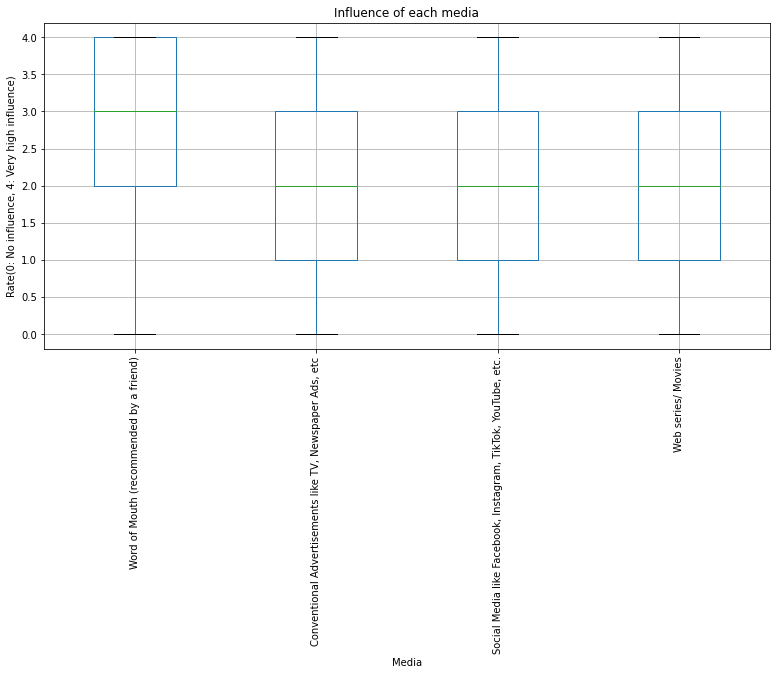

In [ ]:
# While buying a new product online, tell us the influence that each of the media has on your purchase from online retailers on a scale of 0-4
fig = plt.figure(figsize = (13,6))
data12.iloc[:,3:7].boxplot(vert=True)

plt.xticks(rotation='vertical')

plt.title('Influence of each media')
plt.xlabel('Media')
plt.ylabel('Rate(0: No influence, 4: Very high influence)')

plt.show()

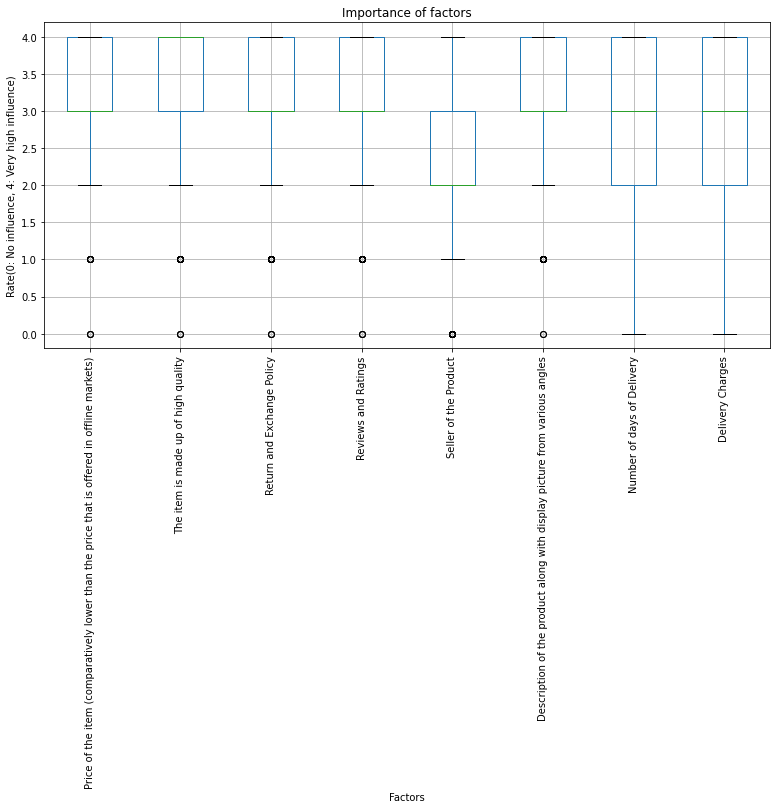

In [ ]:
# Rate the importance of factors that you look while shopping online for an Item on a scale of 0-4
fig = plt.figure(figsize = (13,6))
data12.iloc[:,7:15].boxplot(vert=True)

plt.xticks(rotation='vertical')

plt.title('Importance of factors')
plt.xlabel('Factors')
plt.ylabel('Rate(0: No influence, 4: Very high influence)')

plt.show()

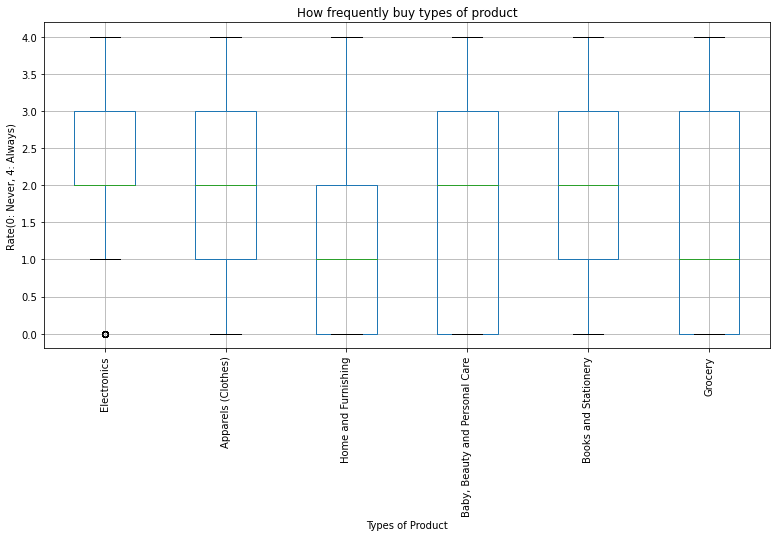

In [ ]:
# How frequently do you shop for the following products online?
fig = plt.figure(figsize = (13,6))
data12.iloc[:,15:21].boxplot(vert=True)

plt.xticks(rotation='vertical')

plt.title('How frequently buy types of product')
plt.xlabel('Types of Product')
plt.ylabel('Rate(0: Never, 4: Always)')

plt.show()

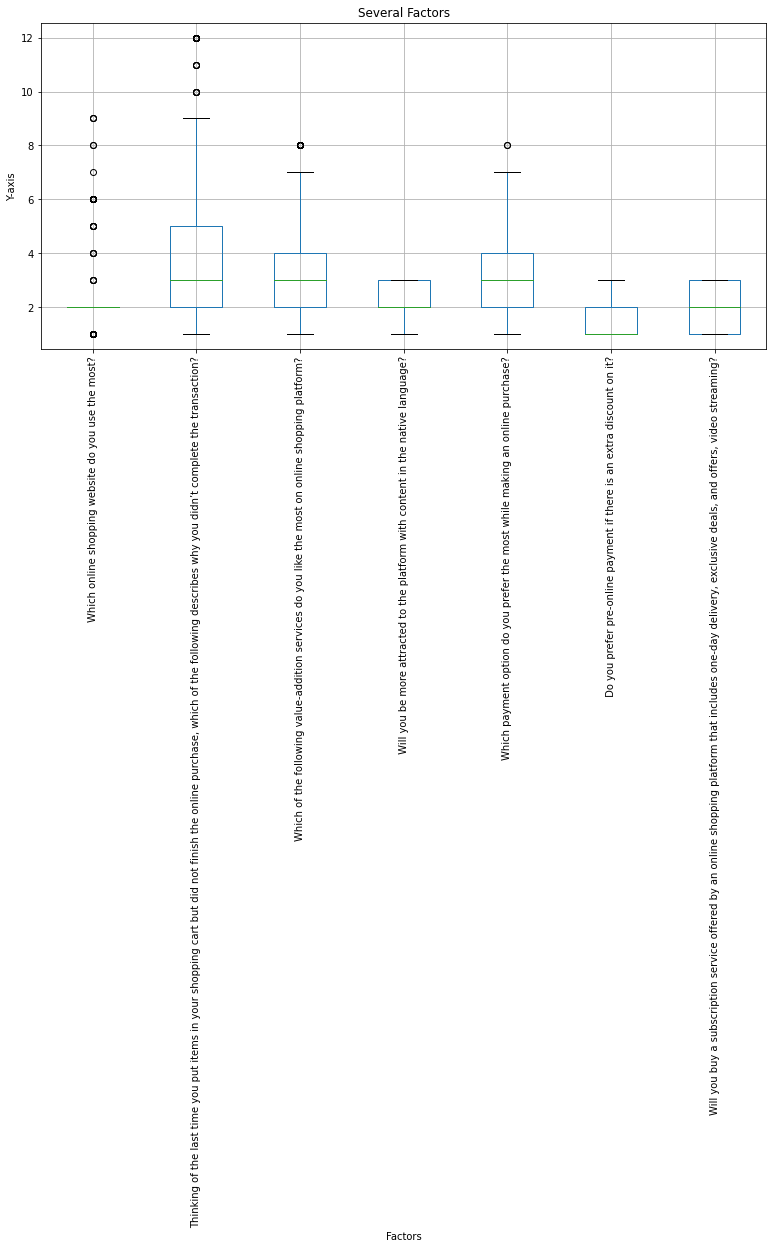

In [ ]:
fig = plt.figure(figsize = (13,6))
data12.iloc[:,21:28].boxplot(vert=True)

plt.xticks(rotation='vertical')

plt.title('Several Factors')
plt.xlabel('Factors')
plt.ylabel('Y-axis')

plt.show()

# **Feature Selection**

## **Brute-Force Method**

<AxesSubplot:>

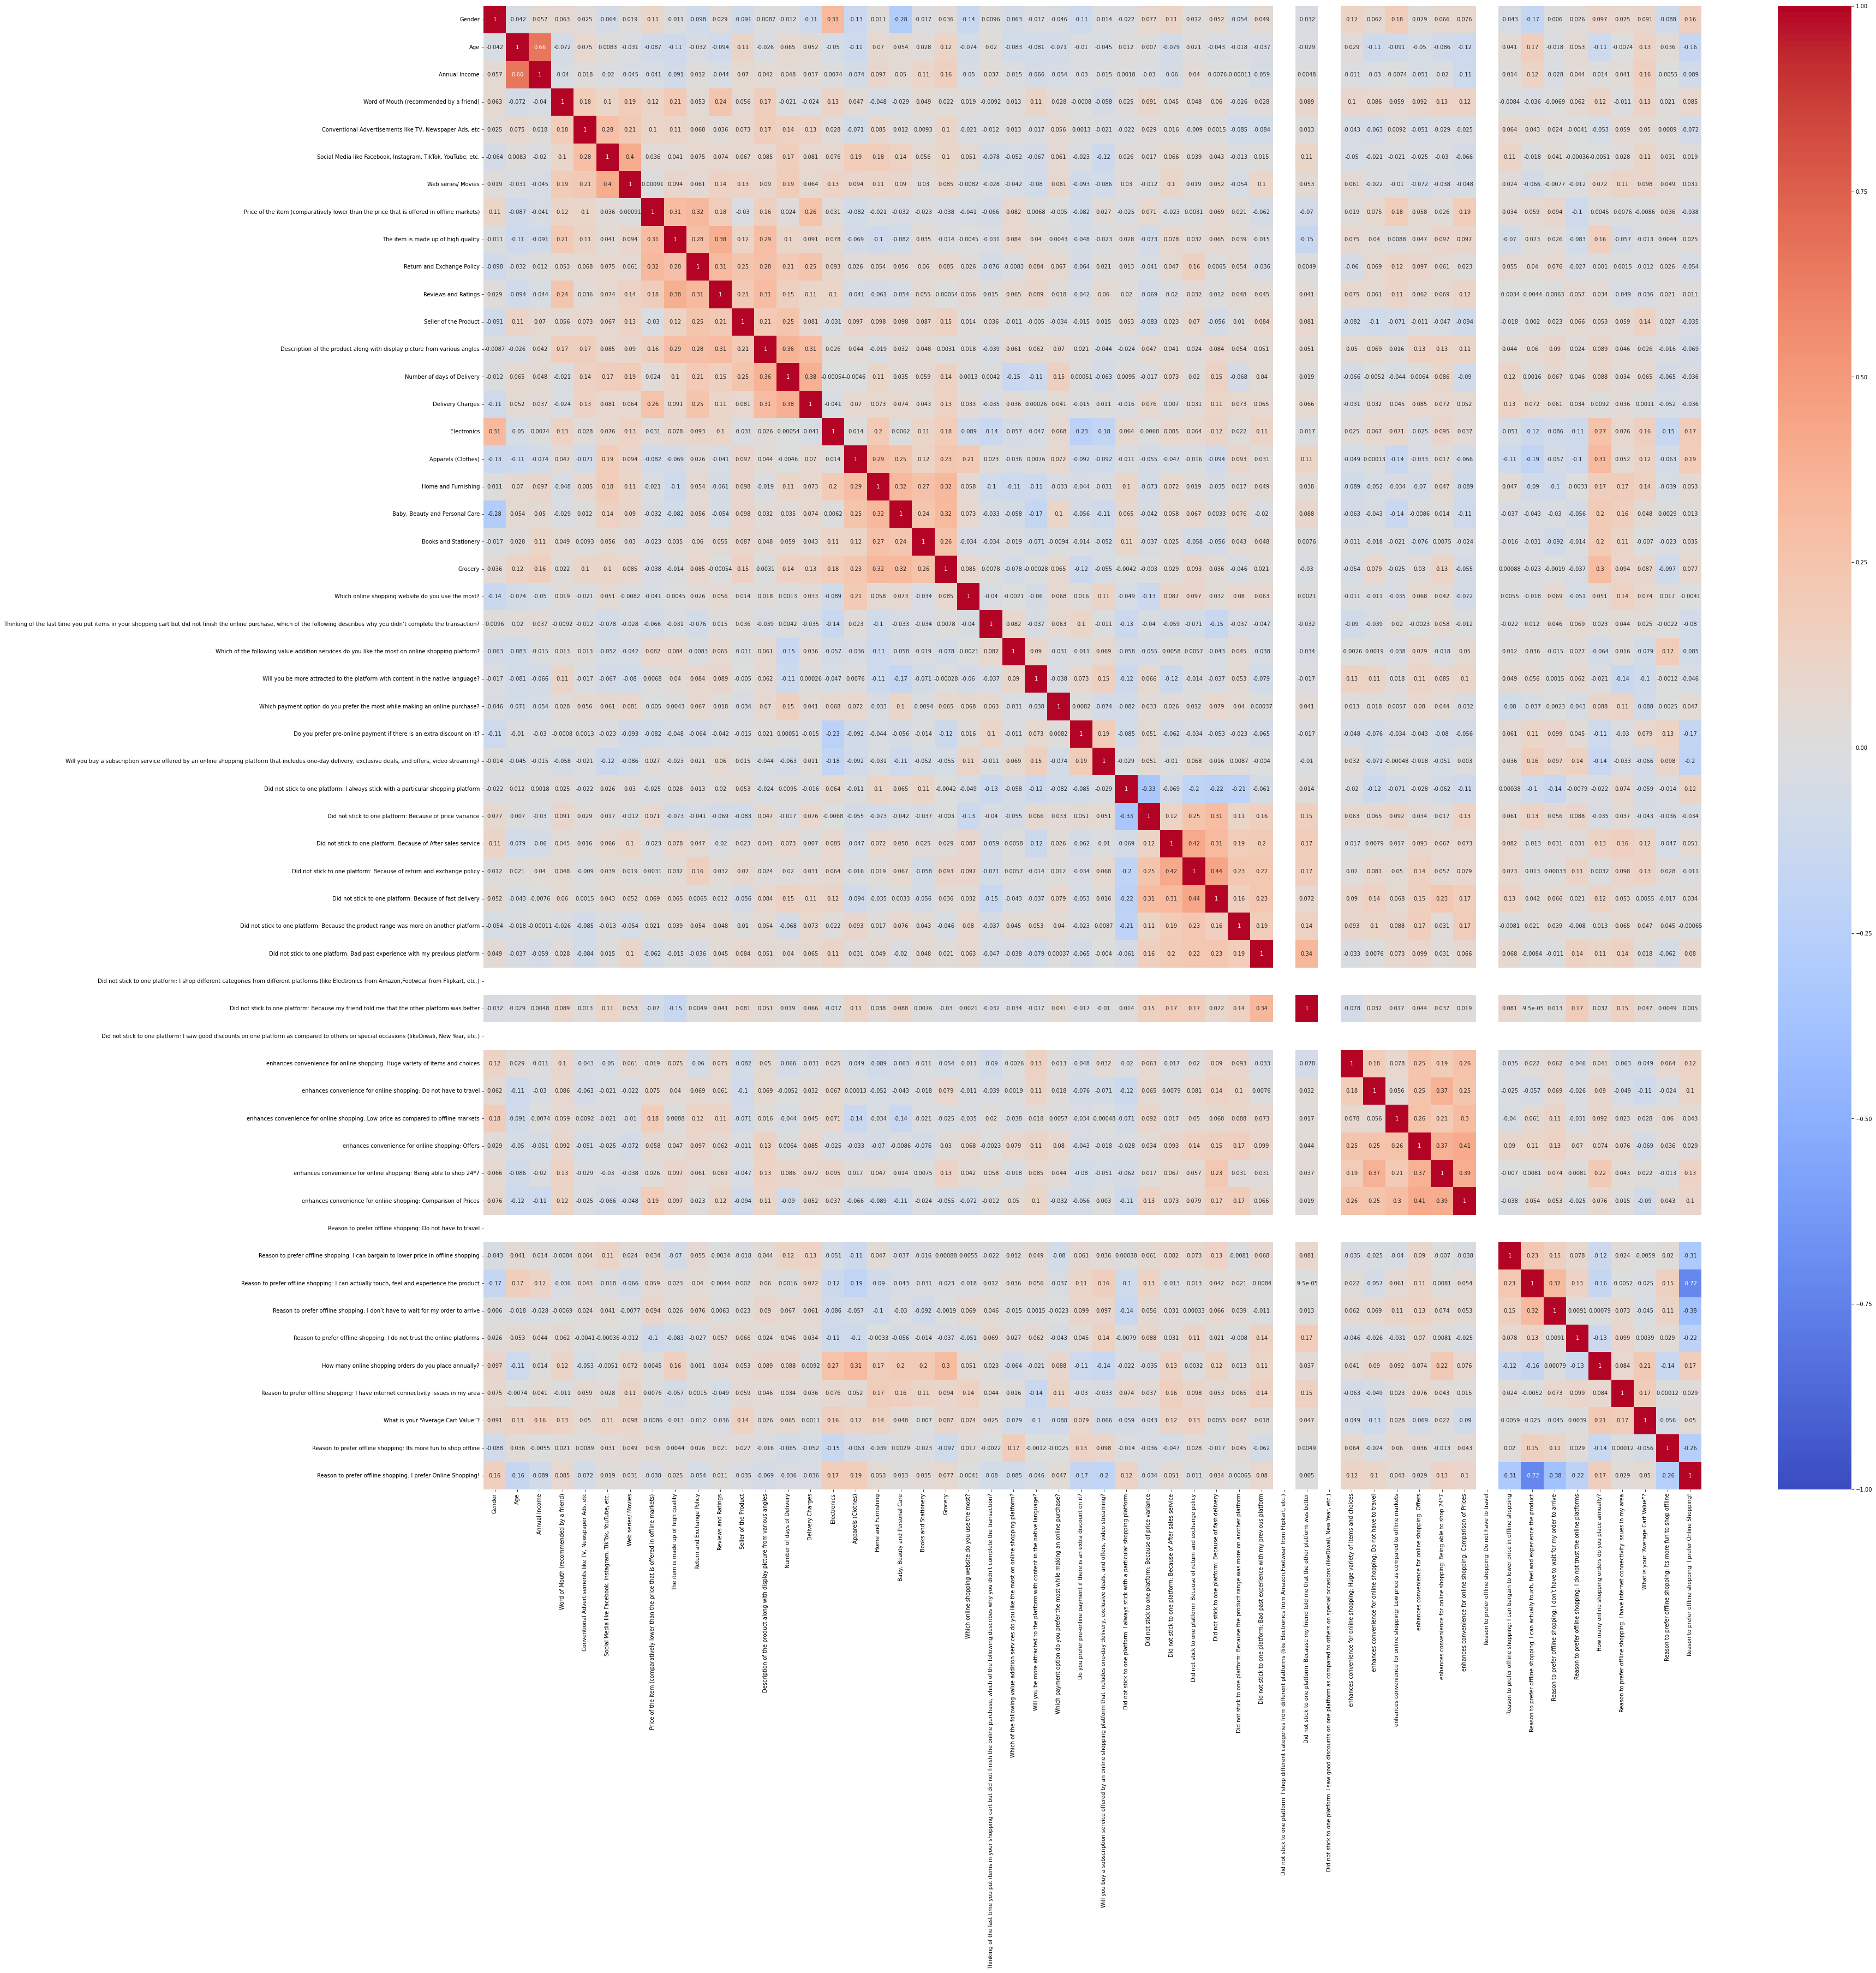

In [ ]:
fig = plt.figure(figsize = (50,50))
sns.heatmap(data12.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

<AxesSubplot:>

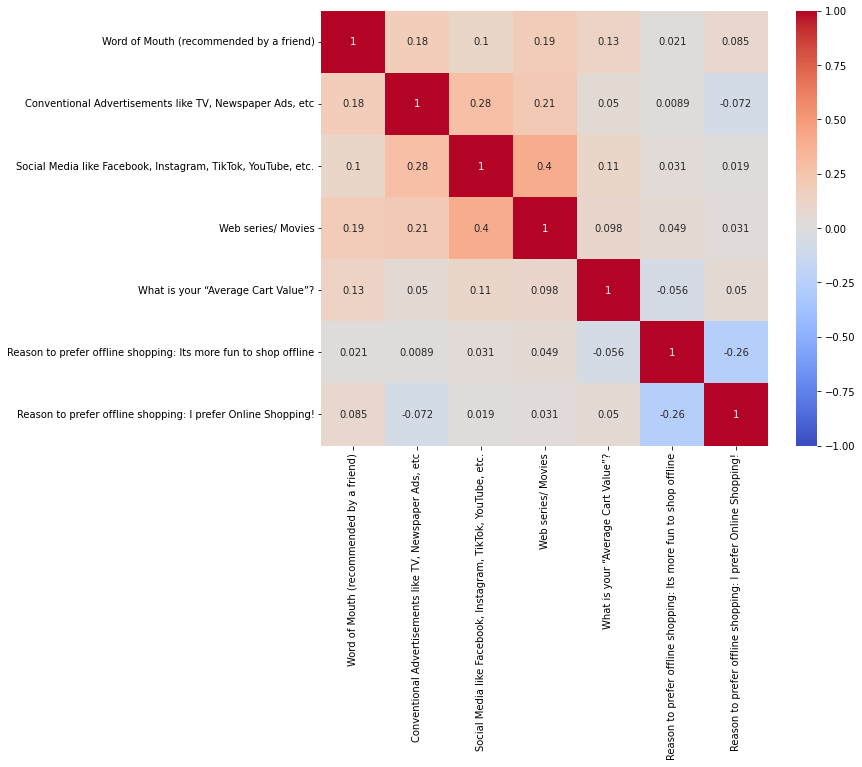

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(ads.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

<AxesSubplot:>

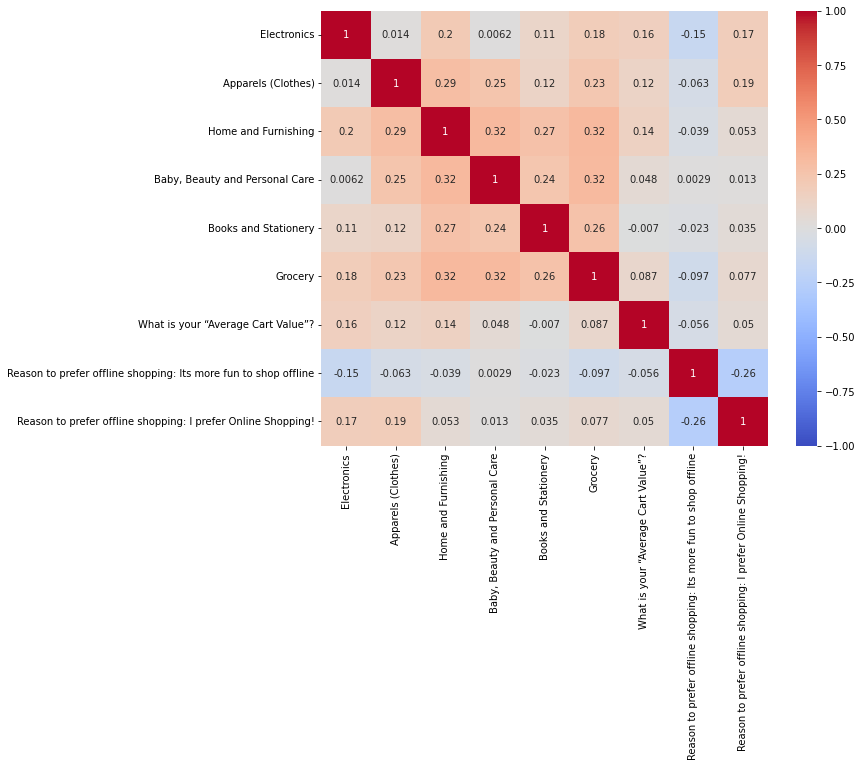

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(types.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

<AxesSubplot:>

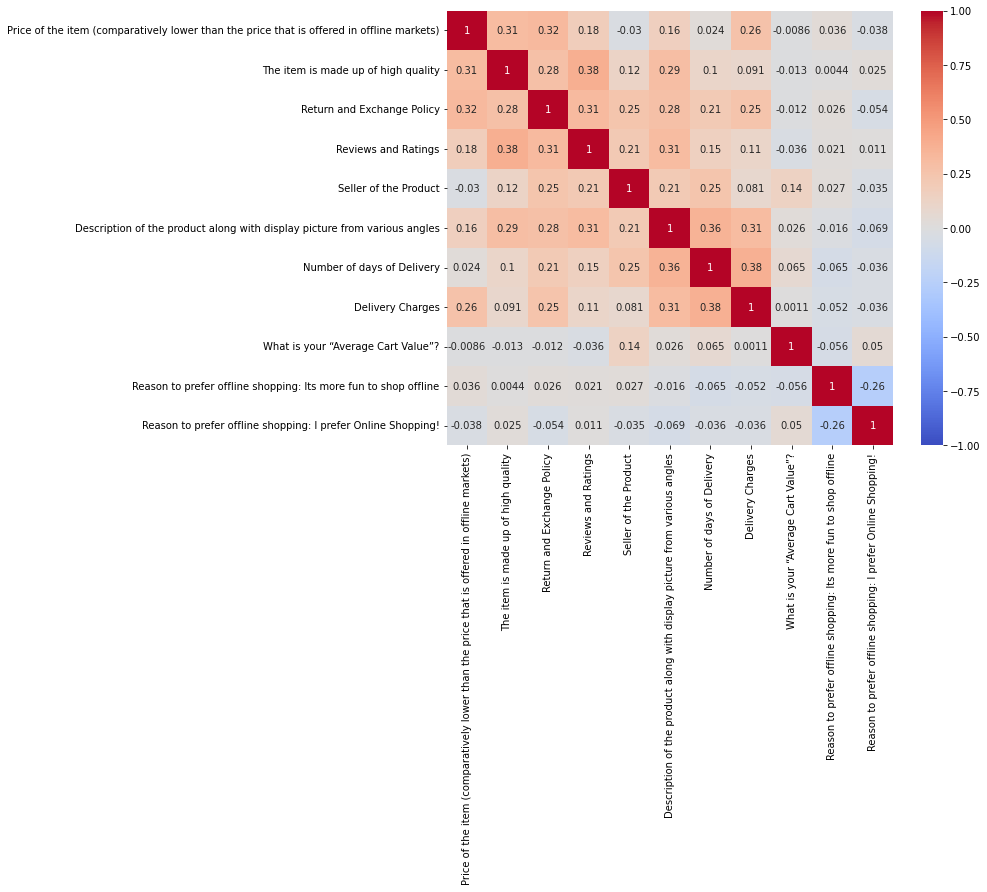

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(factors.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

<AxesSubplot:>

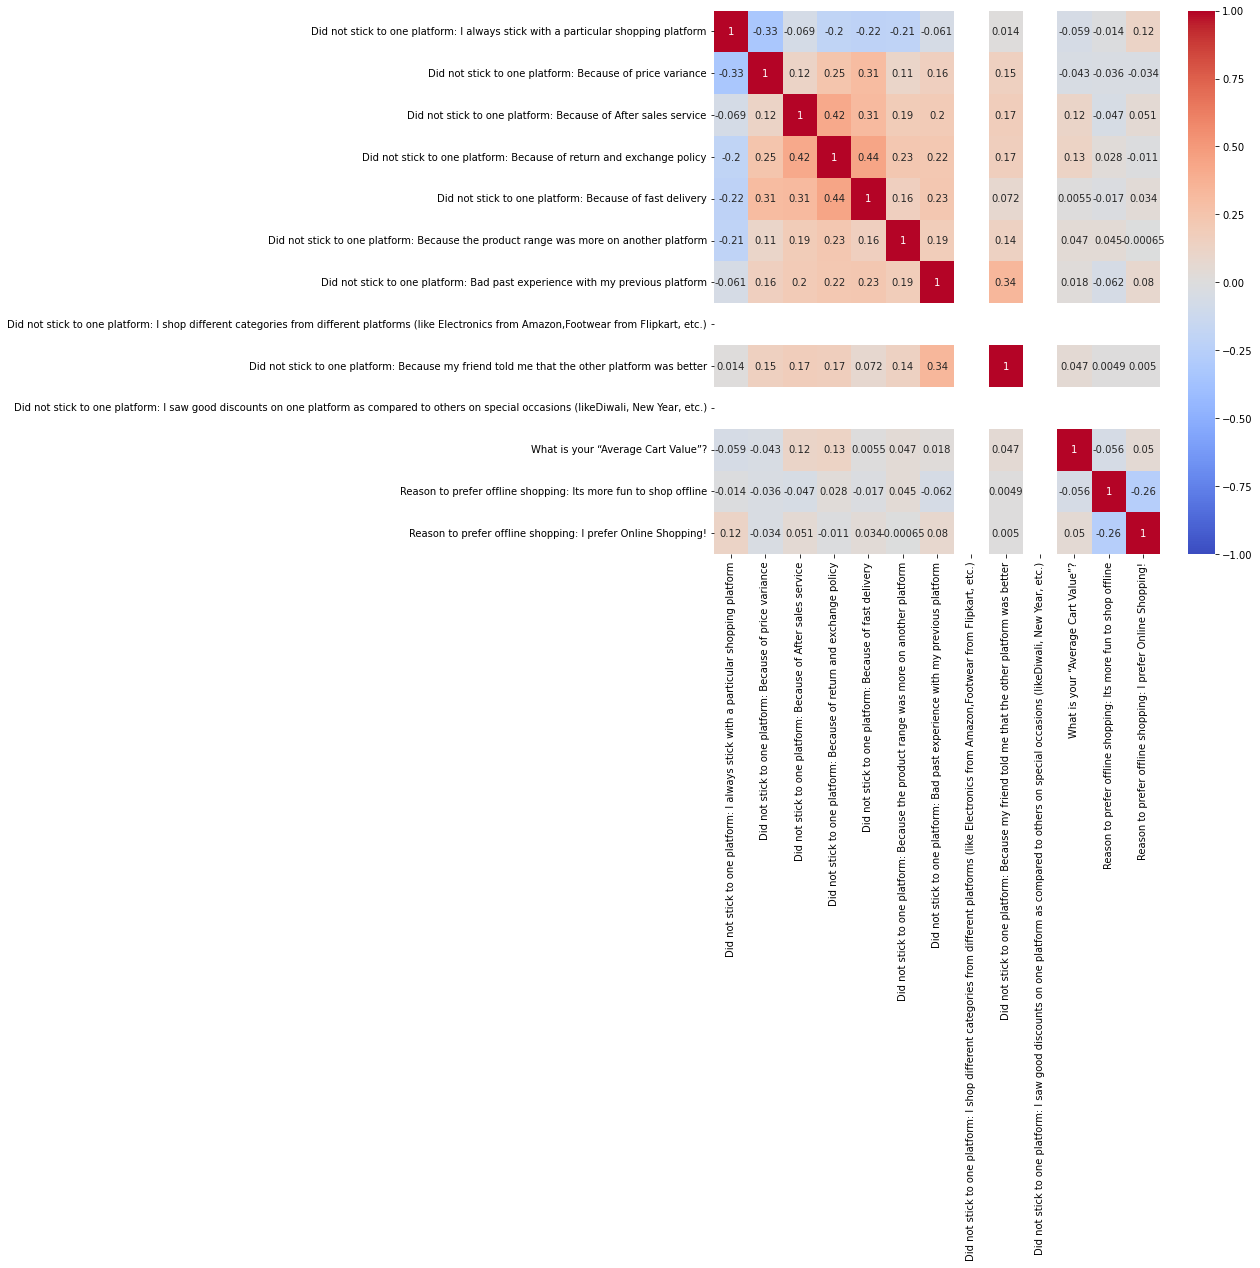

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(stick.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

<AxesSubplot:>

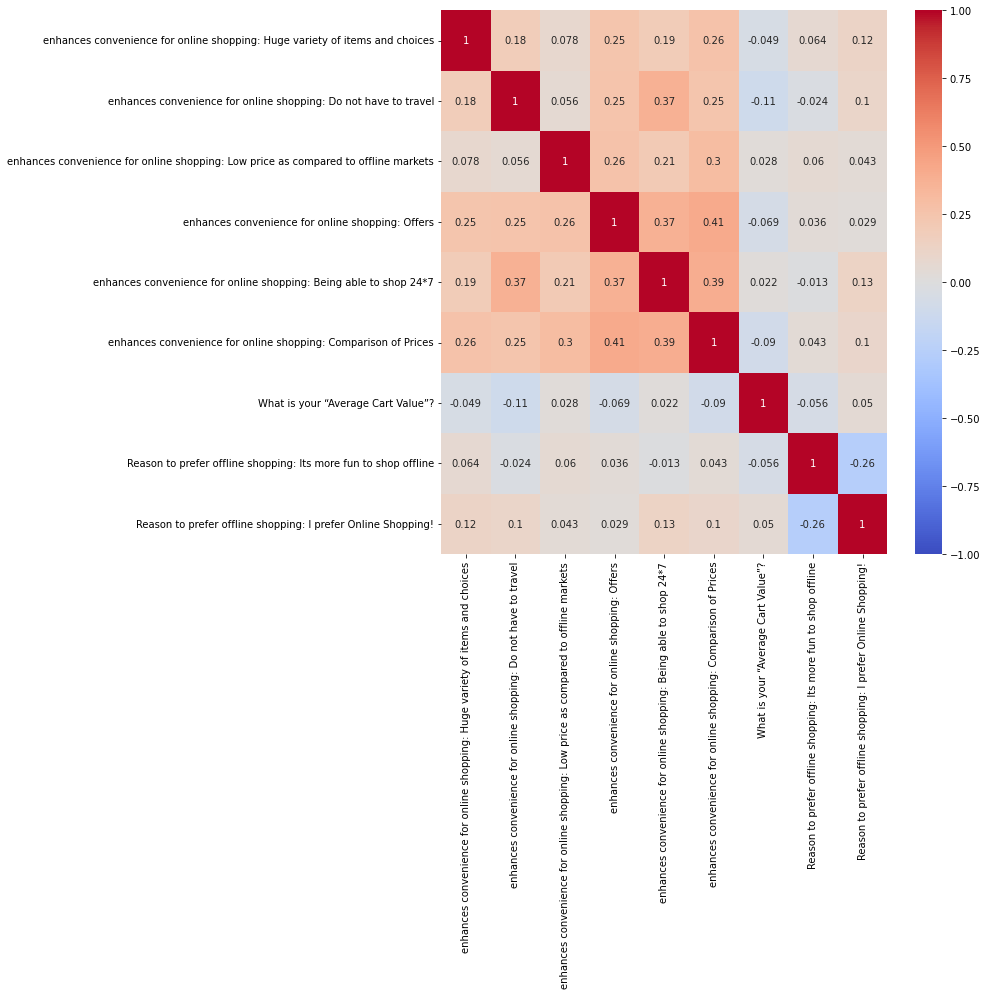

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(enhance.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

<AxesSubplot:>

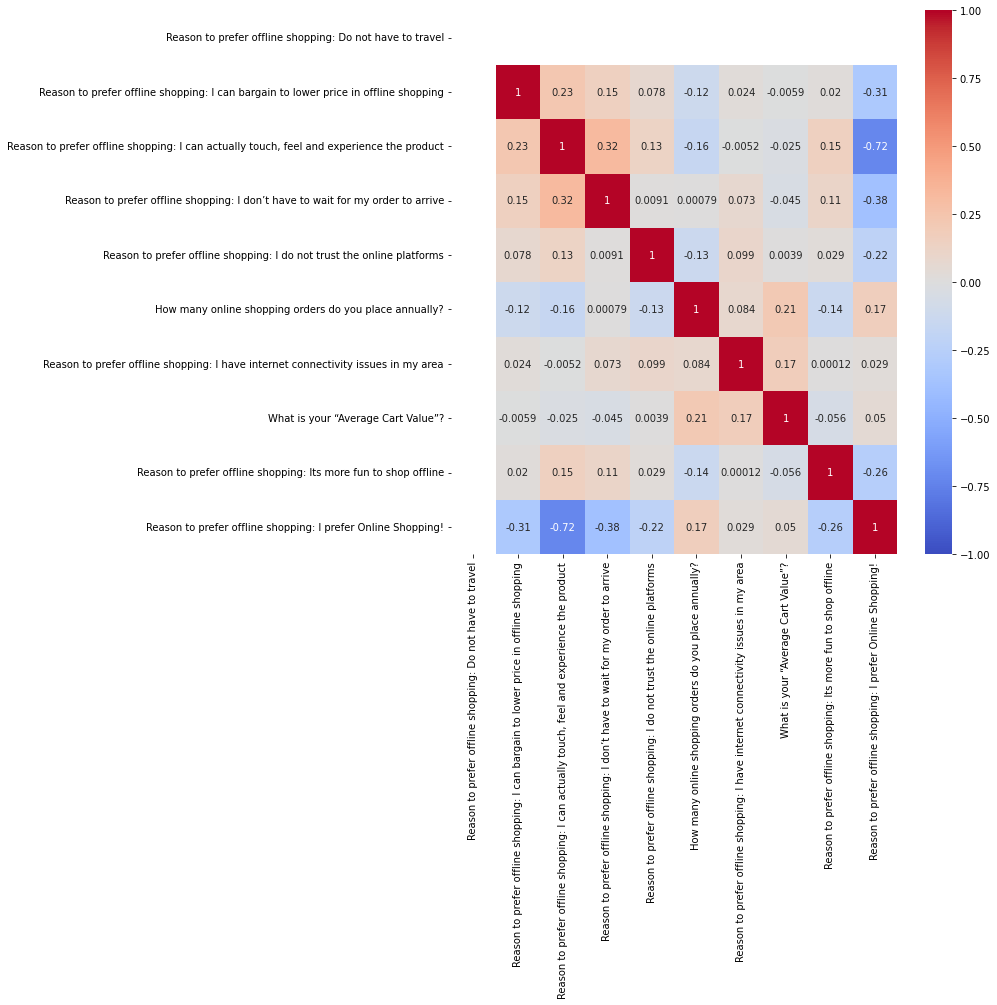

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(prefer.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

**Result:** The first factor that effects my target value the most is "Reason to prefer offline shopping: I can actually touch, feel and experience the product", with -72% Correlation, So as **only** **one** of our features has a correlation between 60 to 80 percent, ***the Heatmap loses its Property***

**Filter**

***Chi2 (for Classification) and f_regression (for regression)***

In [ ]:
#Target Value: Reason to prefer offline shopping: I prefer Online Shopping!

X1 = data12.iloc[:,:-1]
Y1 = data12.iloc[:,-1]

#Apply SelectKBest class to select top n features
bestfeatures = SelectKBest(score_func = chi2, k = 20)       #score_func = f_regression    for Regression Analysis
fit = bestfeatures.fit(X1,Y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)

#Concatenating two mentioned dataframes for better displaying
featurescores = pd.concat([dfcolumns,dfscores], axis = 1)
featurescores.columns = ["feature_name","feature_score"]
print(featurescores.nlargest(20, "feature_score"))

                                         feature_name  feature_score
46  Reason to prefer offline shopping: I can actua...     108.704426
47  Reason to prefer offline shopping: I don’t hav...      48.286568
45  Reason to prefer offline shopping: I can barga...      32.244958
52  Reason to prefer offline shopping: Its more fu...      24.594452
48  Reason to prefer offline shopping: I do not tr...      18.588171
16                                 Apparels (Clothes)       9.998552
27  Will you buy a subscription service offered by...       6.935361
15                                        Electronics       6.901470
22  Thinking of the last time you put items in you...       6.552943
49  How many online shopping orders do you place a...       5.864611
26   Do you prefer pre-online payment if there is ...       5.513420
28  Did not stick to one platform: I always stick ...       5.150806
42  enhances convenience for online shopping: Bein...       3.714385
23  Which of the following value-a

**Result:** The factors that effect Target Value the most is the "Reason to prefer offline shopping: I can actually touch, feel and experience the product". Which is the most effective one with feature score 108.704. The Others are: don’t have to wait for their order to arrive with feature score 48.29, they can find the lower price in offline shopping with feature score 32.24, It's more fun to shopp offline with feature score 24.59 and do not trust online shopping with feature sscore 18.59.

# **Embedded Method**

***PCA***

In [ ]:
#for descriptive DM we have to choose n_components 2 and 3, but for predictive it does not matter what you choose components

In [ ]:
#Buliding model
model = PCA(n_components = 2).fit(data12.iloc[:,:-1].values)           
X_pca = model.transform(data12.iloc[:,:-1].values)

#space for number of components
n_pca = model.components_.shape[0]

#get the most important features
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pca)]

#get names of features
feature_names = data12.iloc[:,:-1].columns
most_important_names = [feature_names[most_important[i]] for i in range(n_pca)]

#final section
df = pd.DataFrame([most_important_names, most_important])
df

,0,1
0,Thinking of the last time you put items in you...,Which of the following value-addition services...
1,22,23


# **SMOTE**

In [ ]:
#Build SMOTE
smote = SMOTE()

#Seperate Values
x = data13.iloc[:,:-1]
y = data13.iloc[:,-1]

#Fit predictor and target values on SMOTE
x_smote, y_smote = smote.fit_resample(x,y)

#Final Result
print("Original dataset shape", y.shape)
print("Resample dataset shape", y_smote.shape)

Original dataset shape (433,)
Resample dataset shape (536,)


In [ ]:
x_smote_df = pd.DataFrame(x_smote, columns = x.columns)
y_smote_df = pd.DataFrame(y_smote)

In [ ]:
data_smote = pd.concat([x_smote_df, y_smote_df], axis = 1)
data_smote

,Gender,Age,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,Return and Exchange Policy,Reviews and Ratings,...,Being able to shop 24*7 enhances convenience for online shopping,Comparison of Prices enhances convenience for online shopping,Reason to prefer offline shopping: Do not have to travel,Reason to prefer offline shopping: I can bargain to lower price in offline shopping,"Reason to prefer offline shopping: I can actually touch, feel and experience the product",Reason to prefer offline shopping: I don’t have to wait for my order to arrive,Reason to prefer offline shopping: I do not trust the online platforms,Reason to prefer offline shopping: I have internet connectivity issues in my area,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
0,0,0.250000,0.500000,0.250000,0.750000,0.000000,1.000000,1.000000,1.000000,0.500000,...,1,1,0,0,0,0,0,0,0,1
1,0,0.250000,1.000000,0.500000,0.500000,0.500000,0.750000,1.000000,1.000000,0.750000,...,1,1,0,0,1,0,0,0,0,0
2,0,0.250000,0.750000,0.500000,0.500000,1.000000,0.500000,1.000000,0.750000,1.000000,...,0,0,0,0,0,0,0,0,0,1
3,0,0.250000,0.750000,0.500000,0.500000,0.250000,1.000000,0.750000,1.000000,0.750000,...,0,0,0,1,1,1,0,0,1,0
4,0,0.500000,1.000000,0.750000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1,0.250000,0.681278,0.500000,0.500000,0.500000,0.681278,0.862556,0.862556,0.862556,...,0,1,0,0,0,0,0,0,0,1
532,0,0.327454,0.711273,0.750000,0.961273,0.961273,0.538727,0.750000,0.750000,0.500000,...,0,0,0,0,0,0,0,0,0,1
533,1,0.250000,0.956952,0.250000,0.500000,0.500000,0.956952,0.793048,0.793048,0.793048,...,0,0,0,0,0,0,0,0,0,1
534,1,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_smote.iloc[:,-1].value_counts()

1    268
0    268
Name: Reason to prefer offline shopping: I prefer Online Shopping!, dtype: int64

In [ ]:
data_smote.duplicated().sum()

7

# **Spiliting the Dataset into the Training set, Validation set, and Test set**

In [ ]:
X2 = data12.iloc[:,:-1]
Y2 = data12.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(303, 53)

In [ ]:
X_test.shape

(130, 53)

In [ ]:
# Create train data
df_train = pd.concat([X_train, Y_train], axis = 1)

# Create test data
df_test = pd.concat([X_test, Y_test], axis = 1)

# Create validation data
valid_train = df_train.sample(n = 30)
valid_test = df_test.sample(n = 13)

# Final result
df_valid = pd.concat([valid_train, valid_test], axis = 0).reset_index().drop("index", axis = 1)

In [ ]:
df_train

,Gender,Age,Annual Income,Word of Mouth (recommended by a friend),"Conventional Advertisements like TV, Newspaper Ads, etc","Social Media like Facebook, Instagram, TikTok, YouTube, etc.",Web series/ Movies,Price of the item (comparatively lower than the price that is offered in offline markets),The item is made up of high quality,Return and Exchange Policy,...,Reason to prefer offline shopping: Do not have to travel,Reason to prefer offline shopping: I can bargain to lower price in offline shopping,"Reason to prefer offline shopping: I can actually touch, feel and experience the product",Reason to prefer offline shopping: I don’t have to wait for my order to arrive,Reason to prefer offline shopping: I do not trust the online platforms,How many online shopping orders do you place annually?,Reason to prefer offline shopping: I have internet connectivity issues in my area,What is your “Average Cart Value”?,Reason to prefer offline shopping: Its more fun to shop offline,Reason to prefer offline shopping: I prefer Online Shopping!
374,1,2,1,4,4,4,4,4,4,4,...,0,1,0,0,0,4,0,1,0,1
287,1,3,3,3,3,4,0,4,4,4,...,0,0,1,0,1,2,0,2,0,0
106,1,2,1,2,1,1,2,3,4,3,...,0,0,0,0,0,1,0,1,0,1
373,1,2,1,3,1,2,3,3,3,3,...,0,0,1,0,0,2,0,5,0,0
63,1,2,1,4,3,1,1,4,4,4,...,0,0,1,0,0,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,2,1,2,3,2,1,3,2,3,...,0,1,1,1,0,1,0,1,0,0
192,1,2,1,2,1,1,2,3,4,4,...,0,0,1,0,0,2,0,2,0,0
117,1,2,1,1,0,0,0,2,4,3,...,0,0,0,0,0,4,0,2,0,1
47,1,4,5,3,3,2,3,4,4,2,...,0,0,1,0,0,1,0,3,0,0


# **Training the KNN model on the Training set**

In [ ]:
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
x_test = df_train.iloc[:,:-1]
y_test = df_train.iloc[:,-1]
x_valid = df_train.iloc[:,:-1]
y_valid = df_train.iloc[:,-1]

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 49)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(p=49)

# **Predict the Test set Results**

In [ ]:
y_t_pred = KNN_model.predict(x_test)

In [ ]:
y_v_pred = KNN_model.predict(x_valid)

# **Evaluation of Algorithm**

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_t_pred)

array([[146,  40],
       [  1, 188]], dtype=int64)

**Accuracy Score**

In [ ]:
accuracy_score(y_test, y_t_pred)

0.8906666666666667

In [ ]:
accuracy_score(y_valid, y_v_pred)

0.8906666666666667

**Precision and Recall**

In [ ]:
precision_score(y_test, y_t_pred)

0.8245614035087719

In [ ]:
recall_score(y_test, y_t_pred)

0.9947089947089947

**F1-Score**

In [ ]:
f1_score(y_test, y_t_pred)

0.9016786570743405

**AUC Score**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_t_pred)
auc = roc_auc_score(y_test, y_t_pred)
auc

0.8898276156340672

**ROC Curve**

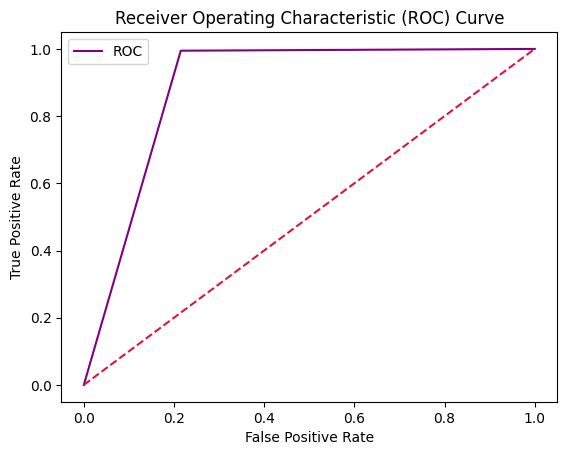

In [ ]:
plt.plot(fpr, tpr, color = 'Purple', label = 'ROC')
plt.plot([0,1], [0,1], color = 'crimson', linestyle = '--')
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Evaluation of Algorithm**

**Confusion Matrix**

***The confusion matrix revealed that out of the total sample size, 78 individuals who preferred shopping online were correctly identified (true positives) and 43 individuals who did not prefer shopping online were also correctly identified (true negatives). However, 6 individuals who actually preferred shopping online were misclassified as not preferring it (false negatives) and 3 individuals who did not prefer shopping online were misclassified as preferring it (false positives).***

**Accuracy Score**

***In order to evaluate the performance of the model, the accuracy was calculated using the formula for Accuracy in the confusion matrix, which is defined as follows:***

***Accuracy = (TP + TN) / (TP + TN + FP + FN)***

***The resulting accuracy of the model was 93.08%***
***So the Accuracy model shows that my model is Very good.***

**Precision and Recall**

**result : The precision score of the model was 93.48%, which means that out of all the individuals who were classified as preferring online shopping, 95.56% of them actually preferred it. This is a very good result.**

***result : The recall score of the model was 87.76%, which means that out of all the individuals who actually preferred online shopping, 87.76% of them were correctly classified as preferring it. This is a very good result.***

**F1-Score**

***result : The F1 score of the model was 90.53, which means that the model is performing very well. This is a very good result.***

# **Evaluation of Algorithm**

**Confusion Matrix**

**Accuracy Score**

***In order to evaluate the performance of the model, the accuracy was calculated using the formula for Accuracy in the confusion matrix, which is defined as follows:***

***Accuracy = (TP + TN) / (TP + TN + FP + FN)***

***The resulting accuracy of the model was 93.85%***
***So the Accuracy model shows that my model is Very good.***

*** result : The precision score of the model was 0.902, which means that out of all the individuals who were classified as preferring online shopping, 90% of them actually preferred it. This is a very good result.***

***result : The recall score of the model was 0.939, which means that out of all the individuals who actually preferred online shopping, 94% of them were correctly classified as preferring it. This is a very good result.***

**F1-Score**

***result : The F1 score of the model was 92%, which means that the model is performing very well. This is a very good result.***